为了讨论损失函数 $L(w, b)$ 使用 $\tanh(kx)$ 近似 $\text{sign}(x)$ 后的凹凸性，我们首先需要考虑 $\tanh(kx)$ 的二阶导数。

1. 计算 $\tanh(kx)$ 的一阶导数和二阶导数。

$$\frac{d}{dx} \tanh(kx) = k \text{sech}^2(kx) （2）$$ 


$$\frac{d^2}{dx^2} \tanh(kx) = -2k^2 \text{sech}^2(kx) \tanh(kx) （3）$$ 

2. 为了确定函数的凹凸性，我们需要检查二阶导数的符号。

从公式（3）中，我们可以看到 $\tanh(kx)$ 的二阶导数的符号取决于 $\tanh(kx)$。当 $x > 0$ 时，$\tanh(kx) > 0$，因此二阶导数为负；当 $x < 0$ 时，$\tanh(kx) < 0$，因此二阶导数为正。这意味着 $\tanh(kx)$ 在 $x = 0$ 处是拐点，且函数在 $x > 0$ 时是凹的，在 $x < 0$ 时是凸的。

3. 对于损失函数 $L(w, b)$，我们考虑 $g(x_i; w, b) y_i$ 的值。当 $g(x_i; w, b) y_i > 0$ 时，样本被正确分类，此时 $\tanh(k g(x_i; w, b) y_i)$ 是凹的；当 $g(x_i; w, b) y_i < 0$ 时，样本被错误分类，此时 $\tanh(k g(x_i; w, b) y_i)$ 是凸的。

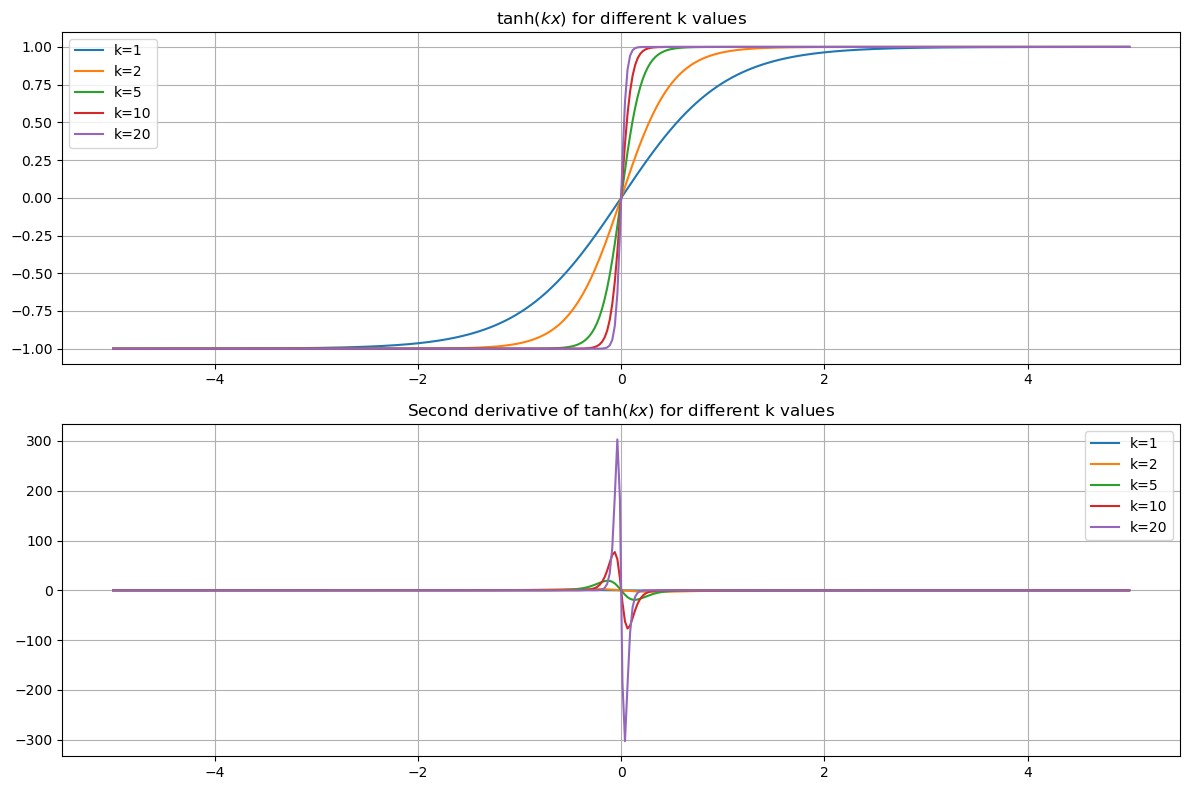

In [155]:
import numpy as np
import matplotlib.pyplot as plt

# 定义tanh(kx)函数和它的二阶导数
def tanh_kx(x, k=1):
    return np.tanh(k * x)

def d2_tanh_kx(x, k=1):
    return -2 * k**2 * (1 / np.cosh(k * x))**2 * np.tanh(k * x)

# 生成x值
x = np.linspace(-5, 5, 400)

# 定义不同的k值
k_values = [1, 2, 5, 10, 20]

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)

for k in k_values:
    plt.plot(x, tanh_kx(x, k), label=f'k={k}')
plt.title(r'$\tanh(kx)$ for different k values')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
for k in k_values:
    plt.plot(x, d2_tanh_kx(x, k), label=f'k={k}')
plt.title(r'Second derivative of $\tanh(kx)$ for different k values')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

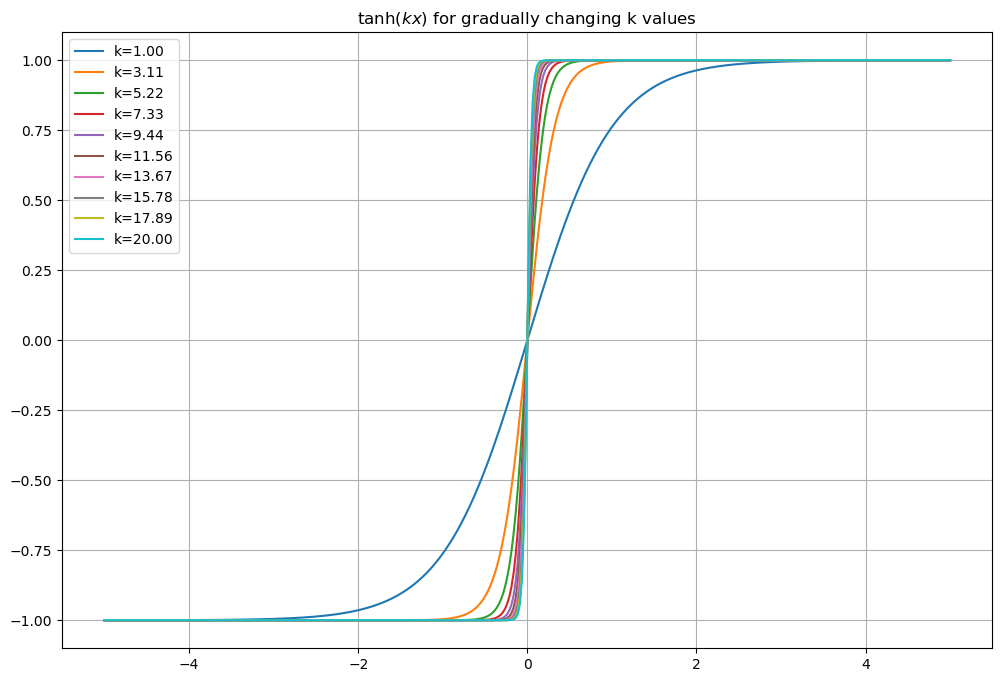

In [156]:
# 定义tanh(kx)函数
def tanh_kx(x, k):
    return np.tanh(k * x)

# 生成x值
x = np.linspace(-5, 5, 400)

# 初始化k的值
k_initial = 1
k_final = 20
num_steps = 10
k_values = np.linspace(k_initial, k_final, num_steps)

plt.figure(figsize=(12, 8))

# 随着迭代改变k值并绘制tanh(kx)函数
for k in k_values:
    plt.plot(x, tanh_kx(x, k), label=f'k={k:.2f}')
    
plt.title(r'$\tanh(kx)$ for gradually changing k values')
plt.grid(True)
plt.legend()
plt.show()

In [157]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [158]:
# 定义一个包含可调整k的线性模型
class LinearModelWithTanh(nn.Module):
    def __init__(self):
        super(LinearModelWithTanh, self).__init__()
        self.linear = nn.Linear(1, 1)
        self.k = nn.Parameter(torch.tensor([1.0]))  # 初始化k为可学习的参数

    def forward(self, x):
        return F.tanh(self.k * self.linear(x))

# 定义损失函数
def loss_fn(outputs, labels):
    return torch.mean((outputs - labels) ** 2)

# 优化函数
# 优化函数
def optimize_and_update_k(model, optimizer, X, y, method="GD", batch_size=10, update_interval=5, increment=1.0, max_k=50.0):
    global epoch  # 使用全局变量来跟踪epoch数
    if method == "SGD":
        indices = torch.randperm(N)
        for i in range(N):
            optimizer.zero_grad()
            loss = loss_fn(model(X[indices[i]:indices[i]+1]), y[indices[i]:indices[i]+1])
            loss.backward()
            optimizer.step()
    elif method == "Mini-batch SGD":
        indices = torch.randperm(N)
        for i in range(0, N, batch_size):
            optimizer.zero_grad()
            loss = loss_fn(model(X[indices[i:i+batch_size]]), y[indices[i:i+batch_size]])
            loss.backward()
            optimizer.step()
    else:  # GD
        optimizer.zero_grad()
        loss = loss_fn(model(X), y)
        loss.backward()
        optimizer.step()

    # 每隔一定的epoch更新k值
    if epoch % update_interval == 0 and model.k.item() < max_k:
        with torch.no_grad():  # 确保不会计算这个操作的梯度
            model.k.add_(increment)  # 增加k的值

# 生成模拟数据
N = 500
torch.manual_seed(66)
X = torch.randn(N, 1)
w_true = torch.tensor([[2.0]])
b_true = torch.tensor([1.0])
y = X @ w_true + b_true + 0.1 * torch.randn(N, 1)

# 训练模型并记录损失
losses_GD = []
losses_SGD = []
losses_MiniBatchSGD = []

In [159]:
# 梯度下降（GD）
model = LinearModelWithTanh()
lr = 0.01
iter = 100
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
epoch = 0
print("GD k values:")
for epoch in range(iter):
    optimize_and_update_k(model, optimizer, X, y, method="GD", update_interval=5, increment=1.0)
    losses_GD.append(loss_fn(model(X), y).item())
    if epoch % 25 == 0:
        print(f"Epoch {epoch}: k = {model.k.item()}")
print(f"Final Epoch {epoch}: k = {model.k.item()}")

# 随机梯度下降（SGD）
model = LinearModelWithTanh()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
epoch = 0
print("\nSGD k values:")
for epoch in range(iter):
    optimize_and_update_k(model, optimizer, X, y, method="SGD", update_interval=5, increment=1.0)
    losses_SGD.append(loss_fn(model(X), y).item())
    if epoch % 25 == 0:
        print(f"Epoch {epoch}: k = {model.k.item()}")
print(f"Final Epoch {epoch}: k = {model.k.item()}")

# 小批量梯度下降（Mini-batch SGD）
model = LinearModelWithTanh()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
epoch = 0
print("\nMini-batch SGD k values:")
for epoch in range(iter):
    optimize_and_update_k(model, optimizer, X, y, method="Mini-batch SGD", update_interval=5, increment=1.0)
    losses_MiniBatchSGD.append(loss_fn(model(X), y).item())
    if epoch % 25 == 0:
        print(f"Epoch {epoch}: k = {model.k.item()}")
print(f"Final Epoch {epoch}: k = {model.k.item()}")

GD k values:
Epoch 0: k = 1.9945342540740967
Epoch 25: k = 6.992291450500488
Epoch 50: k = 11.991679191589355
Epoch 75: k = 16.990758895874023
Final Epoch 99: k = 20.990097045898438

SGD k values:
Epoch 0: k = 2.7475571632385254
Epoch 25: k = 7.377841949462891
Epoch 50: k = 12.116579055786133
Epoch 75: k = 16.628360748291016
Final Epoch 99: k = 20.41950225830078

Mini-batch SGD k values:
Epoch 0: k = 2.2326436042785645
Epoch 25: k = 7.2301225662231445
Epoch 50: k = 12.186799049377441
Epoch 75: k = 17.182294845581055
Final Epoch 99: k = 21.173879623413086


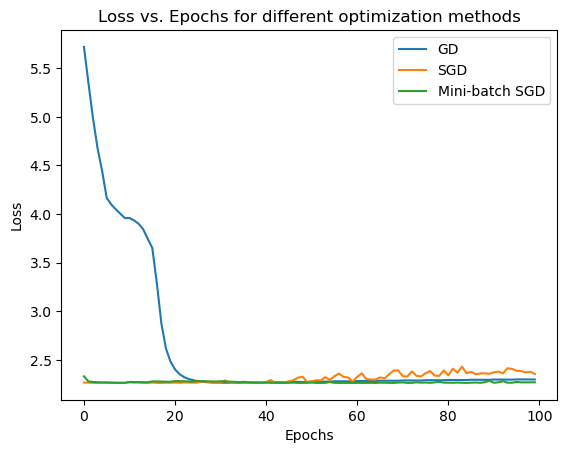

In [160]:
# 绘制损失曲线
plt.plot(losses_GD, label="GD")
plt.plot(losses_SGD, label="SGD")
plt.plot(losses_MiniBatchSGD, label="Mini-batch SGD")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs for different optimization methods")
plt.show()